# Когнитивные технологии

*Алла Тамбовцева, НИУ ВШЭ*

## Оценка связи между переменными, измеренными в разных шкалах

### Немного про шкалы измерения данных

Выделяют четыре основных типа шкал:

* Качественная (номинальная) шкала
* Порядковая (ординальная) шкала
* Абсолютная шкала (шкала отношений)
* Интервальная шкала

Два последних типа часто объединяют и называют *количественной шкалой*. Позволю себе здесь сослаться на [статью](https://ru.wikipedia.org/wiki/%D0%A8%D0%BA%D0%B0%D0%BB%D0%B0) в Википедии, там приведено достаточно подробное описание шкал с примерами.

### Оценка связи между переменными в качественной шкале

Для оценки связи между двумя переменными в качественной (номинальной) шкале используются таблицы сопряжённости (*contingency tables*) и критерий хи-квадрат. Оценим связь между двумя показателями из таблицы, содержащей результаты опроса студентов 1 курса НИУ ВШЭ (ОП «Политология»). Опрос был учебным, но с социолингвистическим уклоном: как жители разных регионов называют различные предметы и какие выражения используют. 

Идея опроса была навеяна спором на кафедре о том, как называть замазку/корректор/штрих и продолжившимся ещё более жарким спором, как продолжить фразу «жадина-говядина – ...». Оказалось, что коллеги из Москвы не использовали вариант «Жадина-говядина – солёный огурец, на полу валяется, никто его не ест», а коллеги не из Москвы никогда не слышали вариант «Жадина-говядина – турецкий барабан, кто на нём играет, тот рыжий таракан». Студентам опрос пришёлся по душе, правда, в какое-то более серьёзное исследование это не переросло.

На сами вопросы можно посмотреть [здесь](https://github.com/allatambov/R-programming-3/blob/master/exam-23-03/soc_ling_form.pdf).

Импортируем библиотеку `pandas` и загрузим файл по ссылке:

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/allatambov/R-programming-3/master/exam-23-03/soc_ling.csv",
                encoding="UTF-8")

Посмотрим на первые строки таблицы:

In [37]:
df.head()

,Unnamed: 0,id,gender,age,place,region,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,conts,okrug,moscow
0,1,1,Женский,19,Москва,Москва,замазка/штрих,ластик/стерка/резинка,штрих,треугольник,ластик,скакалки,штрих,чайник,флешка,соленый огурец,соленый огурец,Центральный,True
1,2,2,Женский,18,Ангарск,Иркутская область,замазка,ластик,замазка,угольник,ластик,скакалка,замазка,чайник,флешка,Пустая шоколадина,турецкий барабан,Сибирский,False
2,3,3,Женский,18,Москва,Москва,замазка,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флэшка,Соленый огурец,соленый огурец,Центральный,True
3,4,4,Женский,18,Тирасполь,Молдавия,корректор,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флешка,Соленый огурец,соленый огурец,Зарубежные территории,False
4,5,5,Женский,19,Вологда,Вологодская область,корректор,ластик,корректор,линейка (или угольник),ластик,скакалка,корректор,чайник,флешка,В попе шоколадина,шоколадина,Северо-Западный,False


Построим таблицу сопряжённости для переменных `conts` (нормализованное продолжение фразы «жадина-говядина – ...») и `region` (родной регион респондента).

In [38]:
pd.crosstab(df.conts, df.region)

region,Алтайский край,Белгородская область,Волгоградская область,Вологодская область,Иркутская область,Калужская область,Молдавия,Молдова,Москва,Московская область,...,Приморский край,Республика Коми,Республика Саха (Якутия),Самарская область,Свердловская область,Тверская область,Узбекистан,ХМАО-Югра,Хабаровский край,"ЦО, Москва"
conts,,,,,,,,,,,,,,,,,,,,,
другое,0,0,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,0,0
соленый огурец,1,1,2,0,0,1,1,0,15,4,...,0,1,0,2,0,1,1,1,1,1
турецкий барабан,0,0,0,0,1,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
турецкий барабан/соленый огурец,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
шоколадина,0,0,0,1,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,0


Таблица сопряжённости – таблица совместных частот. Например, по таблице выше мы можем выяснить, что чаще всего фразу «жадина-говядина» с «турецким барабаном», действительно, используют студенты из Москвы (9), а один студент из Вологодской области, один студент из Иркутской области и три студента из Якутии предложили вариант со словом «шоколадина». 

С такой таблицей работать будет неудобно и не совсем корректно: слишком много ячеек с нулевыми и маленькими частотами. Чтобы этого избежать, укрупним категории, например, объединим все регионы в федеральные округа.

In [9]:
df.region.unique()  # все уникальные значения регионов в таблице

array(['Москва', 'Иркутская область', 'Молдавия', 'Вологодская область',
       'Белгородская область', 'Свердловская область',
       'Московская область', 'Калужская область',
       'Республика Саха (Якутия)', 'Самарская область', 'Приморский край',
       'Тверская область', 'ЦО, Москва', 'Узбекистан', 'Республика Коми',
       'Молдова', 'Пермский край', 'Хабаровский край', 'ХМАО-Югра',
       'Новосибирская область', 'Алтайский край', 'Волгоградская область'],
      dtype=object)

Напишем функцию, которая будет приписывать регион к федеральному округу (для простоты возьмём только те регионы, которые есть в `df`) и создадим новый столбец `okrug`:

In [10]:
def get_okrug(x):
    
    Cent = ['Белгородская область', 'Тверская область', 'ЦО, Москва', 'Москва', 
           'Московская область', 'Калужская область']
    NoWest = ['Вологодская область', 'Республика Коми']
    South = ['Волгоградская область']
    Privolzh = ['Самарская область', 'Пермский край']
    Ural = ['Свердловская область', 'ХМАО-Югра']
    Sibir = ['Алтайский край', 'Новосибирская область', 'Иркутская область']
    DEast = ['Республика Саха (Якутия)', 'Хабаровский край', 'Приморский край']
    Out = ['Молдавия', 'Молдова', 'Узбекистан']
    
    if x in Cent:
        ok = 'Центральный'
    if x in NoWest:
        ok = 'Северо-Западный'
    if x in South:
        ok = 'Южный'
    if x in Privolzh:
        ok = 'Приволжский'
    if x in Ural:
        ok = 'Уральский'
    if x in Sibir:
        ok = 'Сибирский'
    if x in DEast:
        ok = 'Дальневосточный'
    if x in Out:
        ok = "Зарубежные территории"
    return ok

df['okrug'] = df.region.apply(get_okrug)

In [11]:
df.head()

,Unnamed: 0,id,gender,age,place,region,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,conts,okrug
0,1,1,Женский,19,Москва,Москва,замазка/штрих,ластик/стерка/резинка,штрих,треугольник,ластик,скакалки,штрих,чайник,флешка,соленый огурец,соленый огурец,Центральный
1,2,2,Женский,18,Ангарск,Иркутская область,замазка,ластик,замазка,угольник,ластик,скакалка,замазка,чайник,флешка,Пустая шоколадина,турецкий барабан,Сибирский
2,3,3,Женский,18,Москва,Москва,замазка,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флэшка,Соленый огурец,соленый огурец,Центральный
3,4,4,Женский,18,Тирасполь,Молдавия,корректор,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флешка,Соленый огурец,соленый огурец,Зарубежные территории
4,5,5,Женский,19,Вологда,Вологодская область,корректор,ластик,корректор,линейка (или угольник),ластик,скакалка,корректор,чайник,флешка,В попе шоколадина,шоколадина,Северо-Западный


Теперь построим таблицу сопряжёенности для переменных `conts` и `okrug`:

In [42]:
table = pd.crosstab(df.conts, df.okrug)
table

okrug,Дальневосточный,Зарубежные территории,Приволжский,Северо-Западный,Сибирский,Уральский,Центральный,Южный
conts,,,,,,,,
другое,1,1,0,0,0,0,2,0
соленый огурец,1,2,2,1,2,1,23,2
турецкий барабан,0,0,0,0,1,0,9,0
турецкий барабан/соленый огурец,0,0,0,0,0,0,2,0
шоколадина,3,0,1,1,0,1,0,0


Теперь сформируем из обычной таблицы сопряжённости объект типа `Table` из модуля `stats` библиотеки `statsmodels`, чтобы на её основе можно было проверять гипотезу о независимости двух признаков (переменных в качественной шкале).

In [43]:
from statsmodels.api import stats
cont_table = stats.Table(table)

При выявлении связи между качественными признаками выдвигается следующая нулевая гипотеза: 
$$
H_0: \text{признаки независимы (связи нет)}.
$$

Соответственно, альтернативная гипотеза:

$$
H_1: \text{признаки не являются независимыми (связь есть)}.
$$

Как происходит проверка такой нулевой гипотезы? Сравниваются частоты, полученные на основе имеющихся данных (которые мы видели в таблице выше) и ожидаемые частоты – частоты, которые имели бы место, если нулевая гипотеза была бы верна. Считаются разности между наблюдаемыми и ожидаемыми частотами, возводятся в квадрат, чтобы учесть отклонения в обе стороны, и нормируются. Далее определяется сумма этих нормированных квадратов разностей (она имеет распределение [хи-квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82) с числом степеней свободы равным $(nrows-1)(ncols-1)$), и оценивается, является ли полученное значение типичным для такого распределения хи-квадрат в случае, если нулевая гипотеза верна. 

Посмотрим на ожидаемые частоты:

In [44]:
cont_table.fittedvalues

okrug,Дальневосточный,Зарубежные территории,Приволжский,Северо-Западный,Сибирский,Уральский,Центральный,Южный
conts,,,,,,,,
другое,0.789474,0.578947,0.578947,0.473684,0.578947,0.473684,4.052632,0.473684
соленый огурец,3.750000,2.750000,2.750000,2.250000,2.750000,2.250000,19.250000,2.250000
турецкий барабан,1.381579,1.013158,1.013158,0.828947,1.013158,0.828947,7.092105,0.828947
турецкий барабан/соленый огурец,0.592105,0.434211,0.434211,0.355263,0.434211,0.355263,3.039474,0.355263
шоколадина,0.986842,0.723684,0.723684,0.592105,0.723684,0.592105,5.065789,0.592105


А теперь на остатки – стандартизированные разности между наблюдаемыми и ожидаемыми частотами (имеют стандартное нормальное распределение):

In [45]:
cont_table.resid_pearson

okrug,Дальневосточный,Зарубежные территории,Приволжский,Северо-Западный,Сибирский,Уральский,Центральный,Южный
conts,,,,,,,,
другое,0.799671,1.210500,-0.103757,0.038236,-0.103757,0.038236,-0.771258,0.038236
соленый огурец,-1.161895,-0.150756,-0.150756,-0.500000,-0.150756,-0.500000,0.968665,0.166667
турецкий барабан,-0.750021,-0.509815,-0.509815,-0.361296,0.483670,-0.361296,0.904170,-0.361296
турецкий барабан/соленый огурец,-0.119697,0.099840,0.099840,0.242831,0.099840,0.242831,-0.309436,0.242831
шоколадина,2.529857,-0.262942,0.912565,1.179875,-0.262942,1.179875,-2.028581,-0.119697


Если большинство остатков выходят за границы типичных для стандартной нормальной величины значений (обычно таковыми считают значения от $-2$ до $2$), то это может служить основанием для отвержения нулевой гипотезы о независимости признаков. Здесь такого не наблюдается. Убедимся в выводе, определив p-value явно:

In [46]:
res = cont_table.test_nominal_association()
res.pvalue

0.7460857589281362

Действительно, на любом конвенциональном уровне значимости (5%, 10%, 1%) нет оснований отвергнуть нулевую гипотезу. То, как студент продолжает фразу «Жадина-говядина» не связано с тем, в каком федеральном округе он жил больше всего. Проверим то же самое, но не для всех округов, а конкретно для разделения *Москва-не Москва*.

In [47]:
df['moscow'] = df.region == 'Москва'
df.head()

,Unnamed: 0,id,gender,age,place,region,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,conts,okrug,moscow
0,1,1,Женский,19,Москва,Москва,замазка/штрих,ластик/стерка/резинка,штрих,треугольник,ластик,скакалки,штрих,чайник,флешка,соленый огурец,соленый огурец,Центральный,True
1,2,2,Женский,18,Ангарск,Иркутская область,замазка,ластик,замазка,угольник,ластик,скакалка,замазка,чайник,флешка,Пустая шоколадина,турецкий барабан,Сибирский,False
2,3,3,Женский,18,Москва,Москва,замазка,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флэшка,Соленый огурец,соленый огурец,Центральный,True
3,4,4,Женский,18,Тирасполь,Молдавия,корректор,ластик,корректор,линейка,ластик,скакалка,корректор,чайник,флешка,Соленый огурец,соленый огурец,Зарубежные территории,False
4,5,5,Женский,19,Вологда,Вологодская область,корректор,ластик,корректор,линейка (или угольник),ластик,скакалка,корректор,чайник,флешка,В попе шоколадина,шоколадина,Северо-Западный,False


In [49]:
tt = pd.crosstab(df.moscow, df.conts)
cont_table2 = stats.Table(tt)

In [50]:
cont_table2.test_nominal_association().pvalue

0.012555970911947822

В данном случае на имеющихся данных у нас есть основания отвергнуть нулевую гипотезу о независимости признаков на 5% уровне значимости (`pvalue<0.05`). Следовательно, можем считать, что тот факт, из Москвы студент или нет, влияет на то, какую форму продолжения фразы о жадине он выбирает.

### Оценка связи между переменными в порядковой и количественной шкале 

В теоретической части была подробно описана методика расчёта коэффициентов корреляции Пирсона и Спирмена, а также критерии их применимости, поэтому давайте просто посмотрим, как их вычислять с помощью библиотеки `scipy`.

Загрузим уже знакомый по первой части специализации файл с оценками студентов `scores2.csv`:

In [51]:
data = pd.read_csv("https://raw.githubusercontent.com/allatambov/CognTech/master/2-python-libraries/scores2.csv")

In [52]:
data.head()

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Рассчитаем коэффициент корреляции Пирсона между оценками студентов по математике (`mstat`) и статистике (`mstat2`).

In [54]:
import scipy.stats as st

In [55]:
st.pearsonr(data.mstat, data.mstat2)

(0.7679923219060808, 8.027789126694679e-13)

Вспомним, какая гипотеза проверяется при реализации формального критерия: 

$H_0:\rho=0$  (связи нет, коэффициент корреляции не является статистически значимым)

$H_1:\rho \ne0$ (связь есть, коэффцициент корреляции является статистически значимым)

*Интерпретация:* связь положительная и сильная, нулевая гипотеза о незначимости коэффициента корреляции отвергается (на любом конвенциональном уровне значимости), есть значимая связь между оценками по двум частям курса «Математика и статистика».

Однако, в нашем случае для оценки связи между этими переменными уместно всё же выбрать коэффицент корреляции Спирмена, поскольку шкала оценок является порядковой:

In [58]:
st.spearmanr(data.mstat, data.mstat2)

SpearmanrResult(correlation=0.7775327757540231, pvalue=2.74438553278318e-13)

Принципиальных отличий в результатах не наблюдается. Если бы мы хотели оценить (и сразу визуализировать) связь между всеми парами переменных, мы могли бы воспользоваться библиотекой `seaborn` и нарисовать тепловую карту – в данном случае корреляционную матрицу с раскрашенными ячейками, интенсивность цвета которых отвечает за силу связи.

Отберём нужные столбцы (все, кроме номера студенческого и пола студента):

In [65]:
small = data.loc[:,'catps' : 'game']
small = small.dropna()

In [71]:
small.corr('spearman')  # просто корреляционная матрица

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game
catps,1.000000,0.486889,0.463757,0.612845,0.324649,0.521328,0.304417,0.375590,0.359296,0.453633,0.414482,0.351877,-0.054761,0.322722,0.248421
mstat,0.486889,1.000000,0.454128,0.617628,0.453496,0.387593,0.763151,0.378723,0.451124,0.555816,0.358362,0.412886,0.074335,0.156374,0.373145
soc,0.463757,0.454128,1.000000,0.583833,0.447460,0.648979,0.376973,0.656302,0.469249,0.711545,0.671457,0.609008,0.350974,0.570359,0.199828
econ,0.612845,0.617628,0.583833,1.000000,0.396372,0.460055,0.621765,0.345222,0.394722,0.736866,0.381457,0.548871,0.196345,0.400727,0.294552
eng,0.324649,0.453496,0.447460,0.396372,1.000000,0.402075,0.378817,0.342870,0.347054,0.469662,0.406577,0.297888,0.147051,0.266731,0.316410
polth,0.521328,0.387593,0.648979,0.460055,0.402075,1.000000,0.479091,0.742295,0.594268,0.663244,0.705430,0.689714,0.328088,0.654960,0.357327
mstat2,0.304417,0.763151,0.376973,0.621765,0.378817,0.479091,1.000000,0.336946,0.582214,0.641252,0.395679,0.603431,0.275526,0.286390,0.486772
phist,0.375590,0.378723,0.656302,0.345222,0.342870,0.742295,0.336946,1.000000,0.451443,0.567765,0.648999,0.631392,0.384195,0.446884,0.301759
law,0.359296,0.451124,0.469249,0.394722,0.347054,0.594268,0.582214,0.451443,1.000000,0.578009,0.614987,0.576766,0.452761,0.384228,0.336355
phil,0.453633,0.555816,0.711545,0.736866,0.469662,0.663244,0.641252,0.567765,0.578009,1.000000,0.589487,0.773278,0.355612,0.535140,0.443688


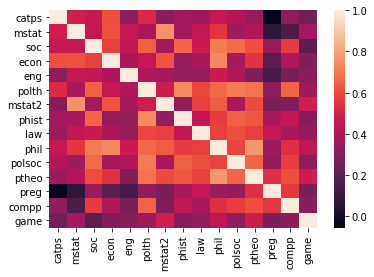

In [73]:
# картинка

import seaborn as sn
sn.heatmap(small.corr('spearman'))

На мой взгляд, будет привычнее, если более высоким значениям коэффициентов корреляции будут соответствовать более тёмные цвет. Изменим палитру:

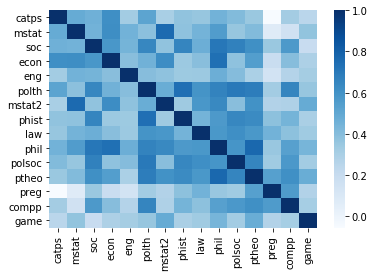

In [76]:
sn.heatmap(small.corr('spearman'), cmap='Blues')

Про цветовые палитры можно почитать [здесь](https://seaborn.pydata.org/tutorial/color_palettes.html).